Importing necessary packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

Directory addressing

In [2]:
ds_dir = r"C:\Users\hp\Desktop\sso_thesis\corrected_dataset"
os.chdir(ds_dir)

In [3]:
cwd = os.getcwd()
print(cwd)

C:\Users\hp\Desktop\sso_thesis\corrected_dataset


In [4]:
csv_folder = os.listdir()
csv_folder

['2018', '2019', '2021']

In [5]:
i = 0
dir1 = ds_dir + "\\" + csv_folder[i] 
os.chdir(dir1)
os.getcwd()

'C:\\Users\\hp\\Desktop\\sso_thesis\\corrected_dataset\\2018'

In [6]:
j = 0
month_folder = os.listdir()
dir2 = dir1 + "\\" + month_folder[j]
os.chdir(dir2)
os.getcwd()

'C:\\Users\\hp\\Desktop\\sso_thesis\\corrected_dataset\\2018\\1 jan 18'

In [7]:
k = 0 
csv_file = os.listdir()
dir3 = dir2 + "\\" + csv_file[k]
print(dir3)
print(csv_file)

C:\Users\hp\Desktop\sso_thesis\corrected_dataset\2018\1 jan 18\1-01-2018.csv
['1-01-2018.csv', '10-01-2018.csv', '11-01-2018.csv', '12-01-2018.csv', '13-01-2018.csv', '14-01-2018.csv', '15-01-2018.csv', '16-01-2018.csv', '17-01-2018.csv', '18-01-2018.csv', '19-01-2018.csv', '2-01-2018.csv', '20-01-2018.csv', '21-01-2018.csv', '22-01-2018.csv', '23-01-2018.csv', '24-01-2018.csv', '25-01-2018.csv', '26-01-2018.csv', '27-01-2018.csv', '28-01-2018.csv', '29-01-2018.csv', '3-01-2018.csv', '30-01-2018.csv', '31-01-2018.csv', '4-01-2018.csv', '5-01-2018.csv', '6-01-2018.csv', '7-01-2018.csv', '8-01-2018.csv', '9-01-2018.csv']


CSV processing

In [8]:
df = pd.read_csv(dir3)
df.drop([0], inplace = True)
df.columns = df.iloc[0]
df.drop([1], inplace = True)
df.reset_index(inplace = True)
df.drop(columns = ["index", "E-W INT.", "EAST GRID", "WEST GRID"], inplace = True)
df.drop(df.index[48:], inplace = True)
df.drop(df.iloc[:, 2 : ], inplace=True, axis=1)
df["TOTAL"] = pd.to_numeric(df["TOTAL"])
df

1,TIME,TOTAL
0,0:00,5673.00
1,0:30,5428.00
2,1:00,5183.00
3,1:30,5045.50
4,2:00,4908.00
5,2:30,4847.00
6,3:00,4786.00
7,3:30,4692.50
8,4:00,4599.00
9,4:30,4596.50


1,TIME,TOTAL
0,0:00,5673.00
1,0:30,5428.00
2,1:00,5183.00
3,1:30,5045.50
4,2:00,4908.00
5,2:30,4847.00
6,3:00,4786.00
7,3:30,4692.50
8,4:00,4599.00
9,4:30,4596.50


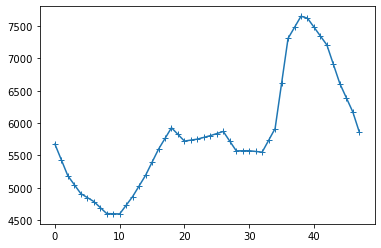

In [9]:
df["TOTAL"].plot(style = "-+")
df1 = df.copy(deep = True)
df1

In [10]:
load_array = np.array(df.TOTAL.values.tolist()) #unused until this comment is removed

Defining Z-normalization function

In [11]:
def znormalization(df):
    """
    ts - each column of ts is a time series (np.ndarray)
    """
    mus = df["TOTAL"].mean()
    stds = df["TOTAL"].std()
    
    return (df["TOTAL"] - mus) / stds

In [12]:
zts = znormalization(df1)
print(np.mean(zts))

-1.687018580387445e-16


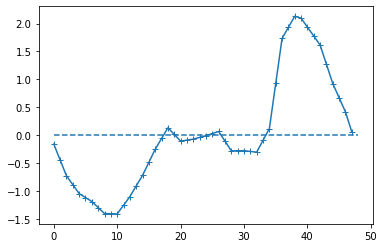

In [13]:
zts.plot(style = "-+")
plt.hlines(np.mean(zts), 0, zts.shape[0], linestyles='--')

In [14]:
def paa_transform(ts, n_pieces):
    """
    ts: the columns of which are time series represented by e.g. np.array
    n_pieces: M equally sized pieces into which the original ts is splitted
    """
    splitted = np.split(ts, n_pieces) ## along columns as we want
    
    splitted_list=[]
    
    for element in splitted:
        splitted_list.append(np.array(element.mean(axis = 0)))
    return splitted_list

In [15]:
len(zts)

48

In [16]:
def paa_zn_transformer(zts, points_per_piece):
    num_pieces = len(zts)/points_per_piece
    data_points_per_piece = int(zts.shape[0]/num_pieces)

    #print("Normalized dataset is splited into {} parts".format(num_pieces))
    #print("Each split contains {} data points".format(data_points_per_piece))

    split = paa_transform(zts, num_pieces)
    split_ext = np.array(np.repeat(split, data_points_per_piece, axis = 0))

    #plt.plot(split_ext)
    #plt.plot(zts)
    #plt.hlines(np.mean(zts), 0, zts.shape[0], linestyles='--')
    
    return split, split_ext

In [17]:
num_pieces = 24
data_points_per_piece = 2
split = paa_transform(zts, num_pieces)
split_ext = np.array(np.repeat(split, data_points_per_piece, axis = 0))

In [18]:
#plt.plot(split_ext)
#plt.plot(zts)
#plt.hlines(np.mean(zts), 0, zts.shape[0], linestyles='--')

In [19]:
def valley_filler(paa_zts, multipliers, load_data_df):
    pza = np.array(paa_zts)
    mean_pza = np.average(pza)
    pza_deviations = pza - mean_pza
    pza_sorted = np.sort(pza_deviations)
    
    load_list = np.array(load_data_df["TOTAL"])
    load_list = load_list - np.mean(load_list)
    load_list_sorted = np.sort(load_list)
    
    load_list_peaks = load_list[load_list > 0]
    load_list_troughs = load_list[load_list < 0]

    sum_peaks = np.sum(load_list_peaks, axis = 0)
    sum_troughs = abs(np.sum(load_list_troughs, axis = 0))
    
    peak_shaved = 0
    
    num_pos = np.sum(pza_sorted > 0, axis = 0)
    num_neg = np.sum(pza_sorted < 0, axis = 0)
    len_pza_sorted = len(pza_sorted)
    
    if type(multipliers) == float:
        temp_mul = []
        
        i = 1
        while i <= len(paa_zts):
            temp_mul.append(multipliers)
            i = i + 1
        
        multipliers = np.array(temp_mul)
    
    i = 0
    for i in range(num_pos):
        index_small = np.where(pza_sorted[i] == pza_deviations)
        index_large = np.where(pza_sorted[-1-i] == pza_deviations)

        pza[index_small[0][0]] = pza[index_small[0][0]] + multipliers[index_small[0][0]]*pza_sorted[-1-i]
        pza[index_large[0][0]] = pza[index_large[0][0]] - multipliers[index_large[0][0]]*pza_sorted[-1-i]
        peak_shaved = peak_shaved + load_list_sorted[-1-i]*multipliers[index_large[0][0]]
    
    
    return pza, sum_peaks, sum_troughs, peak_shaved

In [21]:
pza = valley_filler(split, 0.2, df1)
pza_ext = np.array(np.repeat(pza, data_points_per_piece, axis = 0))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


ValueError: setting an array element with a sequence.

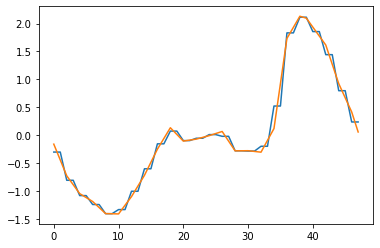

In [23]:
plt.plot(split_ext)
plt.plot(zts)
plt.plot(pza_ext)
plt.hlines(np.mean(zts), 0, zts.shape[0], linestyles='--')

knn strat:
	lay out 365d on a single df
	normalize wrt max val on 24x365 grid
	calc avg of normalized columns
	calc sd in % of normalized columns
	lay out tmax, tmin, rh, rf, matching date columns
	set bins from tmax, tmin, rh, rf. maybe create a formula? bins represent seasons
	set labels in accordance to bins. labels are tied to columns of normalized values, excluding avg and sd
    run knn code. should be similar to iris, just 21 more columns
    see accuracy
    surprise first author with a trained model
    profit?
    
how to cope with changes in powerplant cap???

k Nearest Neighbors

kcm dtw time series strat

In [30]:
source_path = r"C:\Users\hp\Desktop\sso_thesis\corrected_dataset\2021"
psvf_plot_path = r"C:\Users\hp\Desktop\sso_thesis\2021 PSVF"
temperature_df = pd.read_csv(r"C:\Users\hp\Desktop\sso_thesis\2021_avgtemp_labeled_final.csv")
os.chdir(source_path)
count = 0
yearly_peak_sum = 0
yearly_trough_sum = 0
yearly_peak_shaved = 0

for mm in os.listdir():
    mm_path = os.path.join(source_path, mm)
    os.chdir(mm_path)
    for dd in os.listdir():
        dd_path = os.path.join(mm_path, dd)
        df = pd.read_csv(dd_path)
        required_column = df.iloc[:, 4][2 : 50]
        df1 = required_column
        df1 = pd.DataFrame(df1)
        df1.reset_index(inplace = True)
        df1.drop(columns = ["index"], inplace = True)
        df1.columns.values[0] = "TOTAL"
        df1["TOTAL"] = pd.to_numeric(df1["TOTAL"])
        
        zts = znormalization(df1)
        
        split, split_ext = paa_zn_transformer(zts, 2)
        
        multipliers = [0.12, 0.17, 0.20, 0.22, 0.25]
        
        label = int(np.array(temperature_df.iloc[[count], [4]])[0][0])
        #print(label, count)
        count = count + 1
        
        pza, sum_peaks, sum_troughs, peak_shaved = valley_filler(split, multipliers[label], df1)
        pza_ext = np.array(np.repeat(pza, data_points_per_piece, axis = 0))
        
        yearly_peak_sum = yearly_peak_sum + sum_peaks
        yearly_trough_sum = yearly_trough_sum + sum_troughs
        yearly_peak_shaved = yearly_peak_shaved + peak_shaved
        
        plot_file_name = str(label) + "_" + dd.split(".")[0] + ".png"
        destination_path = os.path.join(psvf_plot_path, plot_file_name)
        
        plt.figure(figsize = (32, 18))
        
        plt.plot(split_ext, linewidth = 10, marker = "o", markersize = 20, label = "PAA transformed curve")
        plt.plot(zts, linewidth = 10, label = "Z-normalized load data curve")
        plt.plot(pza_ext, linewidth = 10, label = "PSVF performed curve")
        plt.hlines(np.mean(zts), 0, zts.shape[0], linestyles='--', linewidth = 10, color = "red")
        plt.legend(fontsize = 30)
        
        plt.savefig(destination_path)
        
        plt.clf()

peak_shaved_ratio = yearly_peak_shaved/yearly_peak_sum
trough_filled_ratio = yearly_peak_shaved/yearly_trough_sum
print("Total peak shaving ratio in 2021: ", peak_shaved_ratio)
print("Total valley filling ratio in 2021: ", trough_filled_ratio) #trough is calculated as sum of negative deflections
print("Total peak shaved in 2021: ", yearly_peak_shaved)
print("Daily average peak shaved in 2021: ", yearly_peak_shaved/count)
print("Amount of peak in the year 2021: ", yearly_peak_sum)

C:\Users\hp\AppData\Local\Temp/ipykernel_3672/528465533.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (32, 18))


Total peak shaving ratio in 2021:  0.16211198370557003
Total valley filling ratio in 2021:  0.16211198370557003
Total peak shaved in 2021:  1145316.392708332
Daily average peak shaved in 2021:  3272.3325505952344
Amount of peak in the year 2021:  7064970.5625


<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

In [ ]:
df = pd.read_csv(r"C:\Users\hp\Desktop\sso_thesis\corrected_dataset\2018\1 jan 18\18-01-2018.csv")
required_column = df.iloc[:, 4][2 : 50]
df1 = required_column

In [ ]:
df1 = pd.DataFrame(df1)
df1.reset_index(inplace = True)
df1.drop(columns = ["index"], inplace = True)
df1.columns.values[0] = "TOTAL"
df1["TOTAL"] = pd.to_numeric(df1["TOTAL"])
df1

In [ ]:
pza = np.array(split)
mean_pza = np.average(pza)
pza_deviations = pza - mean_pza
pza_sorted = np.sort(pza_deviations)

load_list = np.array(df1["TOTAL"])
load_list = load_list - np.mean(load_list)
load_list_sorted = np.sort(load_list)

load_list_peaks = load_list[load_list > 0]
load_list_troughs = load_list[load_list < 0]

sum_peaks = np.sum(load_list_peaks, axis = 0)
sum_troughs = np.sum(load_list_troughs, axis = 0)

num_pos = np.sum(pza_sorted > 0, axis = 0)
num_neg = np.sum(pza_sorted < 0, axis = 0)

peak_shaved = 0

len_pza_sorted = len(pza_sorted)

multipliers = 0.2
if type(multipliers) == float:
    temp_mul = []

    i = 1
    while i <= len(split):
        temp_mul.append(multipliers)
        i = i + 1

    multipliers = np.array(temp_mul)

i = 0
for i in range(num_pos):
    index_small = np.where(pza_sorted[i] == pza_deviations)
    index_large = np.where(pza_sorted[-1-i] == pza_deviations)

    pza[index_small[0][0]] = pza[index_small[0][0]] + multipliers[index_small[0][0]]*pza_sorted[-1-i]
    pza[index_large[0][0]] = pza[index_large[0][0]] - multipliers[index_large[0][0]]*pza_sorted[-1-i]
    peak_shaved = peak_shaved + load_list_sorted[-1-i]*multipliers[index_large[0][0]]
    print(load_list_sorted[-1-i])

In [ ]:
load_list_sorted

In [ ]:
num_pos